In [23]:
import pandas as pd
import pandas_datareader.data as web
import talib
import pynance as pn
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np


In [2]:
# Load the data from CSV
dataset = pd.read_csv("C:/Users/huawei/Desktop/Nova_Financial_Solutions/Data/raw_analyst_ratings.csv")


In [3]:
# Convert the 'date' column to datetime
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [4]:
# Determine the minimum and maximum dates in the dataset
min_date = dataset['date'].min()
max_date = dataset['date'].max()

print("Date Range: {} - {}".format(min_date, max_date))

Date Range: 2011-04-27 21:01:48-04:00 - 2020-06-11 17:12:35-04:00


In [5]:
# Define the stock symbol let's use A 
stock_symbol = 'A' 

# Fetch stock data using yfinance
stock_data = yf.download(stock_symbol, start=min_date, end=max_date)

# Display the stock data
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2011-04-28  35.650928  36.151646  35.515022  35.994278  32.349857  3151511
2011-04-29  35.979973  36.251789  35.643776  35.701000  32.086266  3312561
2011-05-02  35.944206  36.309013  35.779686  36.080112  32.426991  3657867
2011-05-03  36.108727  36.251789  35.836910  36.194565  32.529873  3154307
2011-05-04  36.165951  36.273247  35.150215  35.407726  31.822678  5215239


In [6]:
#  Check if required columns exist
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in stock_data.columns]
if missing_columns:
    print(f"Missing columns: {', '.join(missing_columns)}")

In [13]:
# Checking the existing columns in the dataset
columns = stock_data.columns

print("Existing columns in the dataset:")
for column in columns:
    print(column)

Existing columns in the dataset:
Open
High
Low
Close
Adj Close
Volume
MA10
MA50
RSI
MACD


In [12]:
# Extracting the 'Close' price column
close_price = stock_data['Close'].values



In [14]:
# Bollinger Bands
upper_band, middle_band, lower_band = talib.BBANDS(close_price)

# Stochastic Oscillator
slowk, slowd = talib.STOCH(stock_data['High'], stock_data['Low'], stock_data['Close'])

# Average True Range (ATR)
atr = talib.ATR(stock_data['High'], stock_data['Low'], stock_data['Close'])

# On-Balance Volume (OBV)
obv = talib.OBV(stock_data['Close'], stock_data['Volume'])

# Williams %R
williams_r = talib.WILLR(stock_data['High'], stock_data['Low'], stock_data['Close'])

In [15]:

print("Bollinger Bands:")
print(upper_band)
print(middle_band)
print(lower_band)

print("Stochastic Oscillator:")
print(slowk)
print(slowd)

print("Average True Range (ATR):")
print(atr)

print("On-Balance Volume (OBV):")
print(obv)

print("Williams %R:")
print(williams_r)

Bollinger Bands:
[        nan         nan         nan ... 91.29223441 91.27024191
 93.11187952]
[        nan         nan         nan ... 90.41399841 90.27799835
 89.05599823]
[        nan         nan         nan ... 89.53576242 89.28575479
 85.00011694]
Stochastic Oscillator:
Date
2011-04-28          NaN
2011-04-29          NaN
2011-05-02          NaN
2011-05-03          NaN
2011-05-04          NaN
                ...    
2020-06-05    74.554190
2020-06-08    55.787484
2020-06-09    32.195596
2020-06-10    22.529315
2020-06-11    12.269359
Length: 2296, dtype: float64
Date
2011-04-28          NaN
2011-04-29          NaN
2011-05-02          NaN
2011-05-03          NaN
2011-05-04          NaN
                ...    
2020-06-05    86.064057
2020-06-08    73.490366
2020-06-09    54.179090
2020-06-10    36.837465
2020-06-11    22.331423
Length: 2296, dtype: float64
Average True Range (ATR):
Date
2011-04-28         NaN
2011-04-29         NaN
2011-05-02         NaN
2011-05-03         NaN
2011

In [7]:

# Calculate technical indicators using TA-Lib
stock_data['MA10'] = talib.SMA(stock_data['Close'], timeperiod=10)
stock_data['MA50'] = talib.SMA(stock_data['Close'], timeperiod=50)
stock_data['RSI'] = talib.RSI(stock_data['Close'])
stock_data['MACD'], _, _ = talib.MACD(stock_data['Close'])

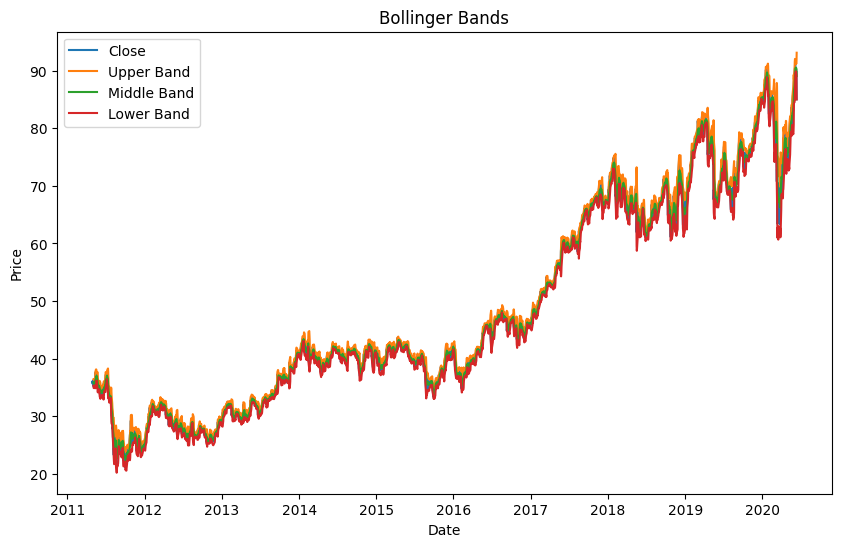

In [8]:
upper_band, middle_band, lower_band = talib.BBANDS(stock_data['Close'])
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close')
plt.plot(upper_band, label='Upper Band')
plt.plot(middle_band, label='Middle Band')
plt.plot(lower_band, label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

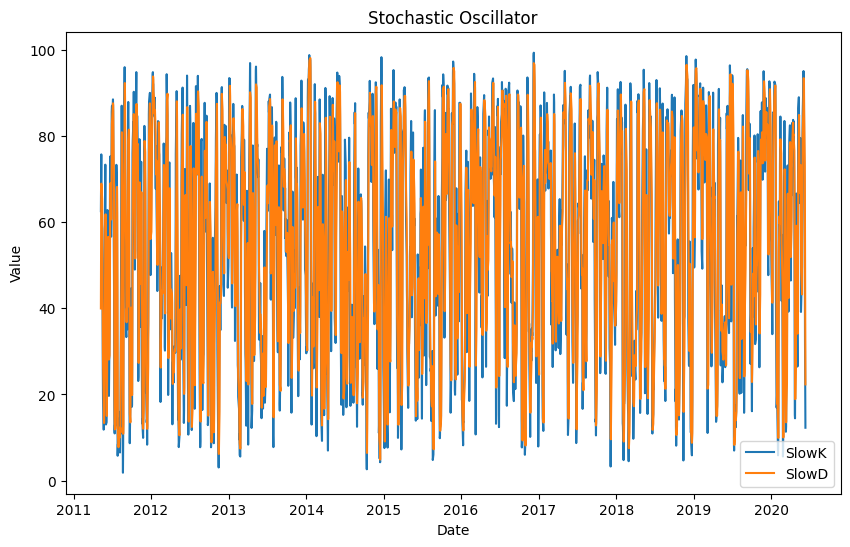

In [9]:
slowk, slowd = talib.STOCH(stock_data['High'], stock_data['Low'], stock_data['Close'])
plt.figure(figsize=(10, 6))
plt.plot(slowk, label='SlowK')
plt.plot(slowd, label='SlowD')
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

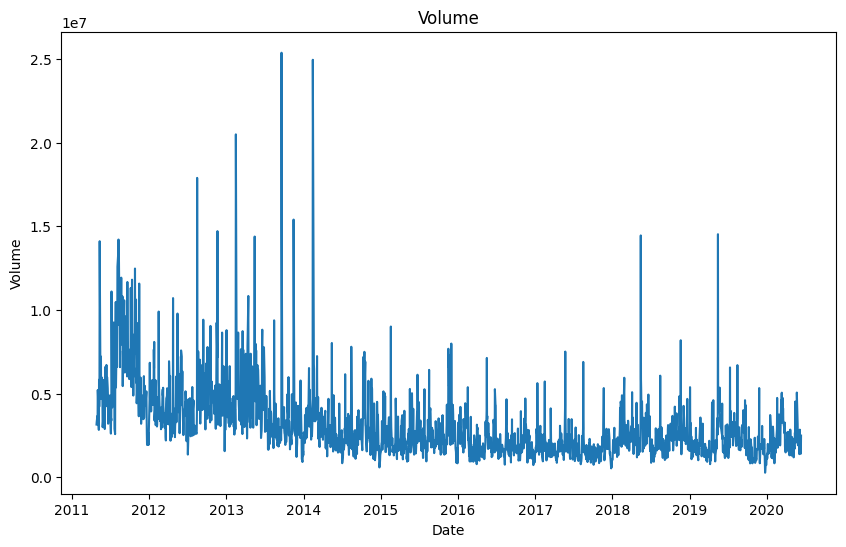

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Volume'])
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

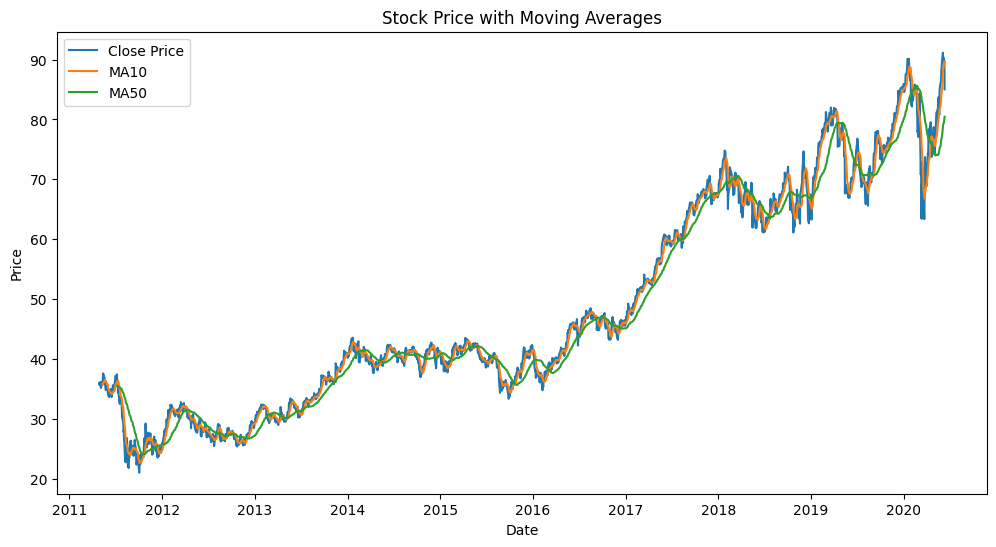

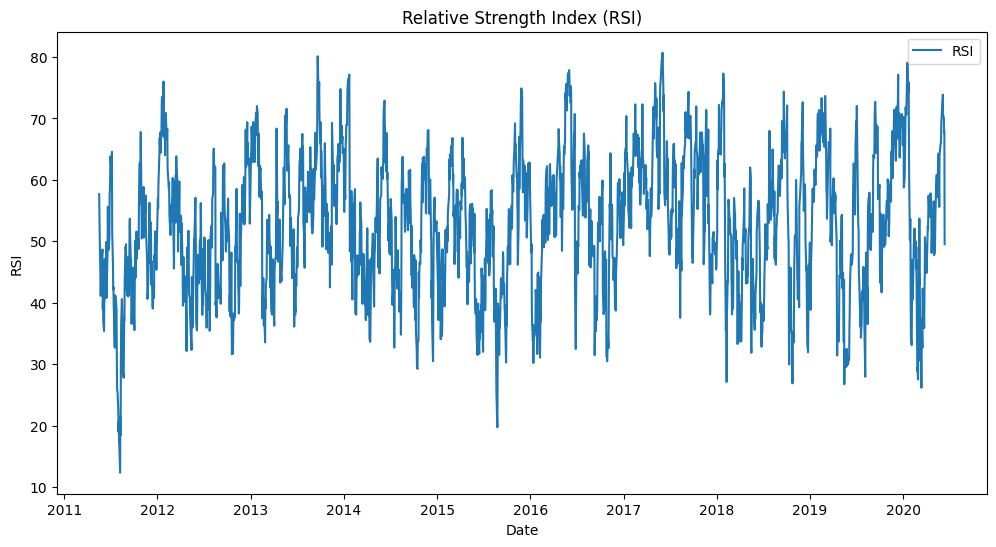

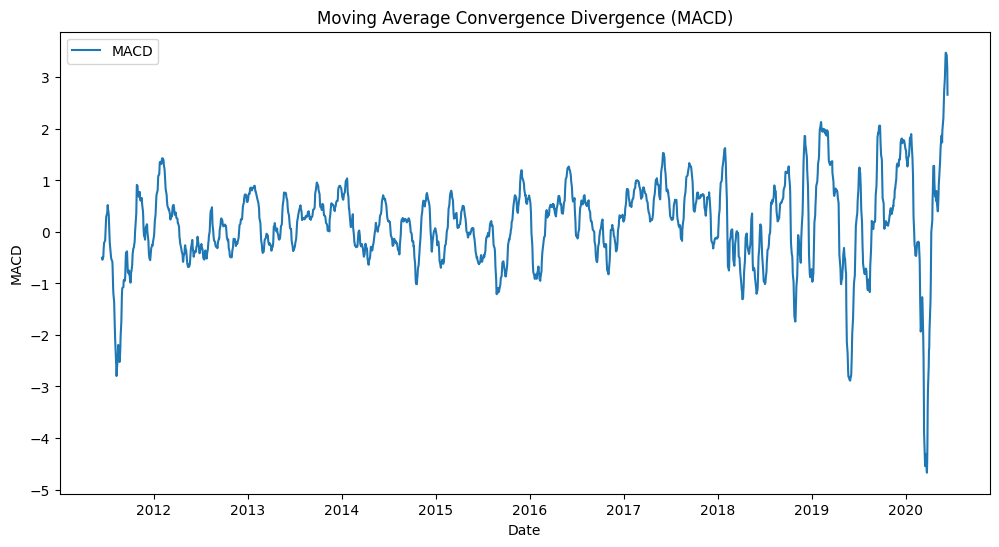

In [11]:

# Create visualizations
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA10'], label='MA10')
plt.plot(stock_data['MA50'], label='MA50')
plt.legend()
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(stock_data['RSI'], label='RSI')
plt.legend()
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(stock_data['MACD'], label='MACD')
plt.legend()
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.show()

In [37]:

# Calculate moving averages
stock_data['MA10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
print(stock_data)

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2011-04-28  35.650928  36.151646  35.515022  35.994278  32.349857  3151511   
2011-04-29  35.979973  36.251789  35.643776  35.701000  32.086266  3312561   
2011-05-02  35.944206  36.309013  35.779686  36.080112  32.426991  3657867   
2011-05-03  36.108727  36.251789  35.836910  36.194565  32.529873  3154307   
2011-05-04  36.165951  36.273247  35.150215  35.407726  31.822678  5215239   
...               ...        ...        ...        ...        ...      ...   
2020-06-05  92.129997  93.040001  90.089996  90.379997  88.029320  2844700   
2020-06-08  89.309998  90.589996  89.059998  90.290001  87.941666  1804700   
2020-06-09  90.089996  90.510002  89.320000  89.769997  87.435173  1817300   
2020-06-10  90.320000  90.580002  89.459999  89.809998  87.474136  1410300   
2020-06-11  88.629997  88.629997  85.019997  85.029999  82.81845

In [36]:
# Compare current stock price with moving averages
stock_data['Price_vs_MA10'] = np.where(stock_data['Close'] > stock_data['MA10'], 'Above', 'Below')
stock_data['Price_vs_MA50'] = np.where(stock_data['Close'] > stock_data['MA50'], 'Above', 'Below')
print(stock_data)


                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2011-04-28  35.650928  36.151646  35.515022  35.994278  32.349857  3151511   
2011-04-29  35.979973  36.251789  35.643776  35.701000  32.086266  3312561   
2011-05-02  35.944206  36.309013  35.779686  36.080112  32.426991  3657867   
2011-05-03  36.108727  36.251789  35.836910  36.194565  32.529873  3154307   
2011-05-04  36.165951  36.273247  35.150215  35.407726  31.822678  5215239   
...               ...        ...        ...        ...        ...      ...   
2020-06-05  92.129997  93.040001  90.089996  90.379997  88.029320  2844700   
2020-06-08  89.309998  90.589996  89.059998  90.290001  87.941666  1804700   
2020-06-09  90.089996  90.510002  89.320000  89.769997  87.435173  1817300   
2020-06-10  90.320000  90.580002  89.459999  89.809998  87.474136  1410300   
2020-06-11  88.629997  88.629997  85.019997  85.029999  82.81845

In [35]:
# Compute descriptive statistics
price_stats = stock_data['Close'].describe()
volume_stats = stock_data['Volume'].describe()
print("Volume Stats ")
print(volume_stats)

print("price Stats ")
print(price_stats)

Volume Stats 
count    2.296000e+03
mean     3.125496e+06
std      2.141162e+06
min      2.719000e+05
25%      1.748175e+06
50%      2.530670e+06
75%      3.804867e+06
max      2.536867e+07
Name: Volume, dtype: float64
price Stats 
count    2296.000000
mean       48.510033
std        17.639628
min        21.030043
25%        34.891025
50%        41.612568
75%        65.965000
max        91.139999
Name: Close, dtype: float64
